# Introduction to Optimization

```{admonition} Learning outcomes
After reading this note, you will be able to:
- Define an optimization problem
- Identify to which class of problems it belongs to
- Define local and global optimality conditions
- Describe the gradient descent procedure
```

## Notation

We will work on a wide variety of optimization problems. We will begin by establishing some common notation that we can use throughout the course. We will typically use small-case and upper-case boldface for vectors and matrices, respectively. A simple, constrained optimization problems could read as follows: 
```{math}
\begin{align}
\min_{\boldsymbol{x}\in\mathcal{X}}\; & f(\boldsymbol{x})\\
\text{subject to } & g_1(\boldsymbol{x}) \leq \boldsymbol{b}_1\\
& g_2(\boldsymbol{x}) = \boldsymbol{b}_2\\
\end{align}
````
Here, $\boldsymbol{x}$ is an $n$-dimensional vector of *decision variables*; these are the values that we can control to achieve an optimal outcome. Notice that under the $\min$ sign, we have declared that this vector must belong to some domain $\mathcal{X}$. The function $f(\cdot)$ maps a vector of values that we assign to decision variables to a real value; it is the *objective function* which we are attempting to minimize here. The functions $g_1(\cdot)$ and $g_2(\cdot)$ are generally *vector-valued*, i.e., they map the input (a vector of decision variable values) to another vector, here of the same dimension $n$. The $\leq$ and $=$ signs here should be interpreted as comparing two vectors: the output of $g_1(\cdot)$ or $g_2(\cdot)$ to vectors $\boldsymbol{b}_1$ or $\boldsymbol{b}_2$, respectively. These last two vectors will be typically referred to as *right-hand side* parameters or vectors.

This is a good time to distinguish decision variables from problem parameters (also sometimes referred to as "data"). As a user of optimization, you are interested in solving some applied or theoretical problem. To *model* the problem, you set certain parameters: your objective function $f(\cdot)$, your constraint functions $g_1(\cdot)$ and $g_2(\cdot)$, and your right-hand side vectors $\boldsymbol{b}_1$ and $\boldsymbol{b}_2$. As for the decision variables, these are to be determined through optimization, which comes down to a certain algorithmic procedure for searching the domain $\mathcal{X}$ of the variables $\boldsymbol{x}$ for values that satisfy the two sets of inequality and equality constraints while also minimizing the objective function.

```{note}
You can *maximize* rather than minimize the objective function $f(\cdot)$ by minimizing the function $-f(\cdot)$. As such, we will alternate between the two in these notes without loss of generality. Similarly, $\geq$ constraints can be expressed using $\leq$ constraints by multiplying both sides of the inequality with $-1$.
```

## Some one and two-dimensional functions

We will frequently make use of two-dimensional (or sometimes three-dimensional) plots to make sense of an optimization problem. Let us look at a continuous function $f:\mathbb{R}\mapsto\mathbb{R}$. This notation simply says that the function $f(\cdot)$ maps from one real number to another. We will use it extensively.

First off is this wiggly function in blue. Let's minimize it assuming only bound constraints on $x$, i.e., with domain $\mathcal{X}=[-4,4]$. There is a unique *global minimum* at around $x=-2.25$. However, there are multiple other *critical points*, points where the function $f$ in blue has derivatives (in orange) equal to zero. Some of these points are also *local minima*; others are *local maxima*.

Since this optimization problem has only simple bound counstraints and involves a continuous function, one can compute all of its local minima and maxima by finding the roots of the function's derivative. This is exactly what we've done in the code; see the next Note for more details on how to elegantly do this.

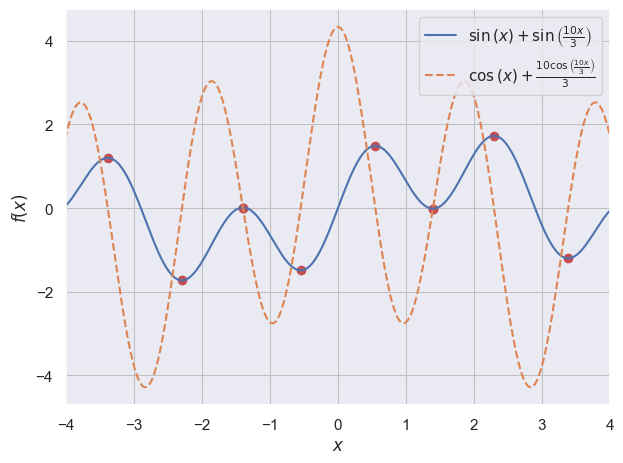

In [1]:
from sympy import * #Symbol, symbols, sin, cos, Polygon, solve, lambdify, Rational, pi, N
from sympy.plotting import plot
from spb import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

fig, ax = plt.subplots()

x = Symbol('x')
funky_function = sin(x) + sin(Rational(10.0, 3.0) * x)
funky_function_lambda = lambdify(x, funky_function)

funky_function_derivative_lambda = lambdify(x, funky_function.diff(x))
sols = fsolve(funky_function_derivative_lambda, np.linspace(-4,4,15))

plt.scatter(sols, [funky_function_lambda(sol) for sol in sols], marker='o', color='r')

p1 = plot(funky_function, show=False, legend=True, xlim=(-4,4), fig=fig, ax=ax)
p2 = plot(funky_function.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,4), fig=fig, ax=ax)
p1.append(p2[0])
p1.show()

```{admonition} Programming note
Look through the cell above to see how the figure was generated. I used Python's SymPy package, a great tool for symbolic computation. Think of it as being similar to MATLAB, in that it understand mathematical functions symbolically rather than numerically. This means that it can automatically derive the derivative of a function just as we would on paper! In additional, I used SciPy's `fsolve()` to find the zeros or roots of the derivative $f'(\cdot)$. This function took 15 initial guesses of where the roots of the orange derivative function are, then it searched around them. We will not go into this process in detail, but it is also a kind of optimization.
```

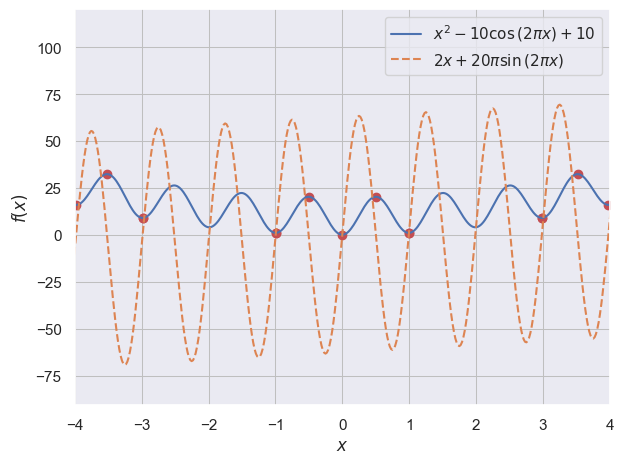

In [2]:
fig, ax = plt.subplots()

x = Symbol('x')
funky_function2 = 10 + x**2 - 10*cos(2*pi*x)
funky_function2_lambda = lambdify(x, funky_function2)

funky_function2_derivative_lambda = lambdify(x, funky_function2.diff(x))
sols = fsolve(funky_function2_derivative_lambda, np.linspace(-4,4,15))

plt.scatter(sols, [funky_function2_lambda(sol) for sol in sols], marker='o', color='r')

p1 = plot(funky_function2, show=False, legend=True, xlim=(-4,4), fig=fig, ax=ax)
p2 = plot(funky_function2.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,4), fig=fig, ax=ax)
p1.append(p2[0])
p1.show()

Let's move on to some two-dimensional functions. This one is a famous "test function" referred to as [*Branin*](https://www.sfu.ca/~ssurjano/branin.html). The color correspond to the z-axis values, more blue for smaller values, more yellow for larger values.

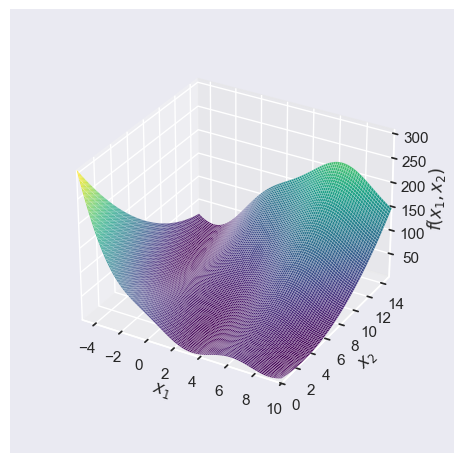

36*(-0.2125*x1**2/pi**2 + 5*x1/(6*pi) + x2/6 - 1)**2 + (10 - 5/(4*pi))*cos(x1) + 10

In [3]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.8)

# This is the famous Branin function: https://www.sfu.ca/~ssurjano/branin.html
a=1; b=5.1/(4*pi**2); c=5/pi; r=6; s=10; t=1/(8*pi)
x1, x2 = symbols('x1 x2')
branin_function = a*(x2-b*x1**2+c*x1-r)**2+s*(1-t)*cos(x1)+s

# sol = [float(-pi),12.275] # The two other minima are [9.42478, 2.475] and [pi,2.275]
# plt.scatter([sol[0]], [sol[1]], [funky_function_lambda(sol[0], sol[1])], marker='o', color='r')

p1 = plot3d(branin_function, (x1, -5, 10), (x2, 0, 15), fig=fig, ax=ax)
p1.show()
branin_function

Another interesting test function with a unique global minimum at $(-2.903534, -2.903534)$.

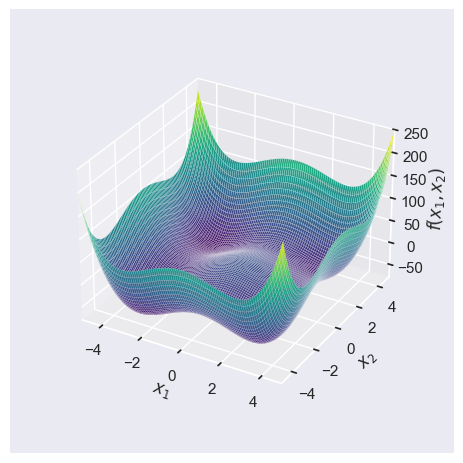

0.5*x1**4 - 8.0*x1**2 + 2.5*x1 + 0.5*x2**4 - 8.0*x2**2 + 2.5*x2

In [4]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.8)

# This is this function: https://www.sfu.ca/~ssurjano/stybtang.html
x1, x2 = symbols('x1 x2')
stybtang_function = 0.5*(x1**4 - 16*(x1**2) + 5*x1 + x2**4 - 16*(x2**2) + 5*x2)
stybtang_function_lambda = lambdify([x1, x2], stybtang_function)

# The global minimum; unable to plot it for some reason
# sol = [-2.903534, -2.903534] 
# plt.scatter([sol[0]], [sol[1]], [funky_function_lambda(sol[0], sol[1])], marker='o', color='r')

p1 = plot3d(stybtang_function, (x1, -5, 5), (x2, -5, 5), fig=fig, ax=ax)
p1.show()
stybtang_function

### Saddle points

Lastly, a very simple function in which a critical point with gradient (i.e., derivative in two dimensions or more) zero that is **not** a local minimum or maximum! Can you identify where the point is?

We call *saddle point* any point which has zero derivatives in all variables but is not a local extremum (minimum or maximum). You should already be able to imagine that the existence of saddle points can make optimization difficult!

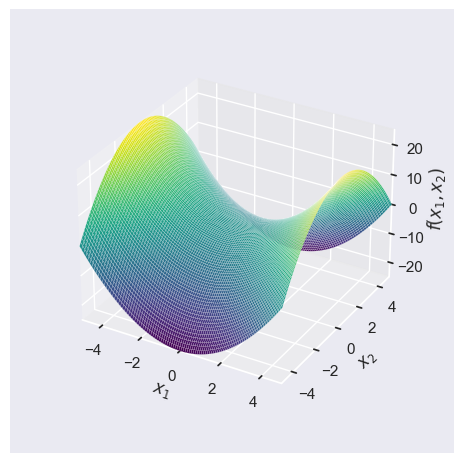

sin(x) + sin(10*x/3)

In [5]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.8)

x1, x2 = symbols('x1 x2')
saddle_function = x1**2 - x2**2
saddle_function_lambda = lambdify([x1, x2], saddle_function)

plt.scatter(0,0,0, c='r', marker='o')
p1 = plot3d(saddle_function, (x1, -5, 5), (x2, -5, 5), fig=fig, ax=ax)
p1.show()
funky_function

### Contour plots

What if we wanted to visualize this last function in *two dimensions* rather than three? Contour plots enable that as you can see in the next figure. The annotated curves show the function value achieved by points on that curve. Notice that our saddle point $(0,0)$ is in the middle and it achieves a value of zero. Move up or down from it, and the value is smaller, i.e., the saddle point is *not* a local minimizer!

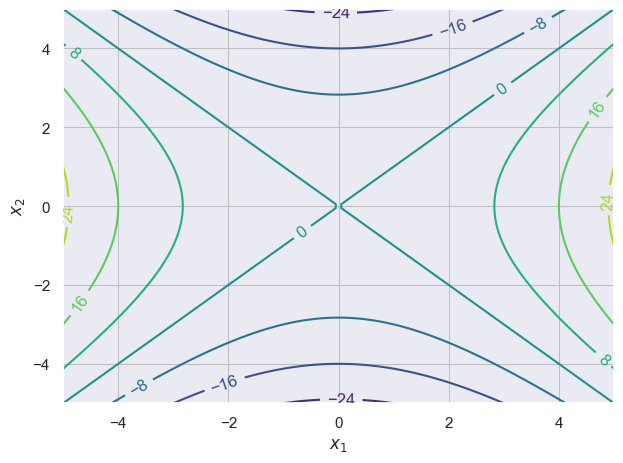

In [6]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
p1 = plot_contour(saddle_function, (x1, -5, 5), (x2, -5, 5), is_filled=False, fig=fig, ax=ax)
p1.show()

## Definitions of local and global minimizers

```{prf:definition} Local minimizer
:label: local-min
A *local minimizer* is a point that minimizes a function $f$ within a neighborhood. In other words, $\hat{\boldsymbol{x}}$ is a local minimizer if there exists a $\delta > 0$ such that $f(\hat{\boldsymbol{x}}) \leq  f(x)$ whenever $\hat{\boldsymbol{x}}\neq \boldsymbol{x}$ and $\lVert \boldsymbol{x}-\hat{\boldsymbol{x}}\rVert<\delta$.
```

```{prf:definition} Global minimizer
:label: global-min
A *global minimizer* is a point that minimizes a function $f$, i.e., $f(\hat{\boldsymbol{x}}) \leq  f(\boldsymbol{x})$ for all $\boldsymbol{x}\in\mathcal{X}$.
```

## Gradient descent

In some of the plots of one-dimensional functions earlier, we saw the function $f$ as well as its derivative $f'$ in orange. For a one-dimensional function, the derivative at a given point is the rate at which the value of $f$ changes at a given point $\boldsymbol{x}$. The value of the derivative is equal to the slope of the tangent line at point $\boldsymbol{x}$. Let's visualize this.

The green line is the tangent to $f$ at the red point $x$. The slope of the tangent shown in the legend is the the value of the derivative $f'$. How do we interpret the value of this derivative? If we move very slightly away from the red point towards the right, the value of $f$ will decrease by $\approx -2.11$. 

The other important use of the derivative here is that if we wanted to decrease the value of $f$ starting from the red point $\boldsymbol{x}$, we should indeed move in the direction *opposite* to the derivative, i.e., we should move to a new point $$\hat{\boldsymbol{x}} = \boldsymbol{x} - \eta f'(\boldsymbol{x}),$$ where $\eta > 0$ is the **step-size**. Multiplying $-2.11$ by $-1$ means that the new point $\hat{\boldsymbol{x}}$ will be to the right of ${\boldsymbol{x}}$, as desired. This is a *gradient descent* step!

If you wanted to maximize $f$ instead, you would move in the other direction, i.e., $\hat{\boldsymbol{x}} = \boldsymbol{x} + \eta f'(\boldsymbol{x})$. Notice here that the choice of step-size is important: too big or too small a step can move us away from good local minima or maxima.

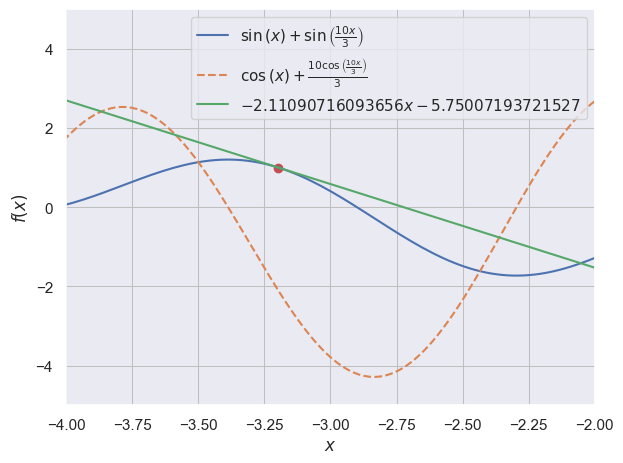

In [7]:
from sympy import * #Symbol, symbols, sin, cos, Polygon, solve, lambdify, Rational, pi, N
from sympy.plotting import plot
from spb import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

fig, ax = plt.subplots()

x = Symbol('x')
funky_function = sin(x) + sin(Rational(10.0, 3.0) * x)
funky_function_lambda = lambdify(x, funky_function)

funky_function_derivative_lambda = lambdify(x, funky_function.diff(x))
sols = fsolve(funky_function_derivative_lambda, np.linspace(-4,4,15))
point = sols[0]+1

plt.scatter(point, funky_function_lambda(point), marker='o', color='r')

p1 = plot(funky_function, show=False, legend=True, xlim=(-4,-2), ylim=(-5,5), fig=fig, ax=ax)
p2 = plot(funky_function.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,-2), fig=fig, ax=ax)
p1.append(p2[0])

p3 = plot(funky_function_derivative_lambda(point)*(x-point) + funky_function_lambda(point), show=False, fig=fig, ax=ax)
p1.append(p3[0])

p1.show()

Let's implement gradient descent and apply it to this function! The Python function takes as input the function to be minimized, the function representing its derivative, an initial point, and optional step-size and iteration limit parameters.

We print out what happens in every iteration. You can see that depending on `initial_point`, you may end up at a different local minimum. Increasing the step-size by a lot is risky; try it out!

In [8]:
def gradient_descent(f, fprime, initial_point, stepsize=0.1, iteration_limit=100):
    # the number of variables
    dimension = len(initial_point)
    all_zeros = np.zeros(dimension)

    # initial point, value, and gradient
    current_iterate = initial_point
    current_value = f(current_iterate)
    grad = fprime(current_iterate)
    iter_counter = 0
    print("iteration, x, f(x), f'(x)")
    print(iter_counter, current_iterate, current_value, grad)

    # the algorithm terminates if iteration_limit is hit or the gradient at the current iterate is close to zero
    while not np.isclose(grad, all_zeros) and iter_counter < iteration_limit:
        # gradient descent step
        current_iterate -= stepsize * fprime(current_iterate)
        current_value = f(current_iterate)
        grad = fprime(current_iterate)
        iter_counter += 1
        print(iter_counter, current_iterate, current_value, grad)
    return current_iterate

local_min = gradient_descent(funky_function_lambda, funky_function_derivative_lambda, np.array([-4.0]), stepsize=0.1)

iteration, x, f(x), f'(x)
0 [-4.] [0.06285096] [1.74642876]
1 [-4.17464288] [-0.11666179] [0.22072933]
2 [-4.19671581] [-0.11909016] [-0.00120963]
3 [-4.19659485] [-0.11909023] [1.44181969e-05]
4 [-4.19659629] [-0.11909023] [-1.71428281e-07]
5 [-4.19659627] [-0.11909023] [2.03829825e-09]
